In [2]:
import pandas as pd

In [3]:
hc3_all_sentences_df = pd.read_csv('hc3_all_sentences_preds.csv')
hc3_all_sentences_df['pred_label'] = hc3_all_sentences_df['pred'].map({'Human':0, 'ChatGPT':1})

In [4]:
def true_negatives(data):
    return (data['label']==0) & (data['pred_label']==0)

def false_positives(data):
    return (data['label']==0) & (data['pred_label']==1)

def false_negatives(data):
    return (data['label']==1) & (data['pred_label']==0)

def true_positives(data):
    return (data['label']==1) & (data['pred_label']==1)

In [5]:
hc3_all_sentences_gltr_df = pd.read_csv('hc3_all_sentences_gltr.csv')
len(hc3_all_sentences_gltr_df)

568516

In [6]:
import ast
ast.literal_eval(hc3_all_sentences_gltr_df.iloc[0]['real_topk'])

[(2127, 6e-05),
 (11, 0.00866),
 (0, 0.35426),
 (7, 0.02588),
 (63, 0.00132),
 (0, 0.52702),
 (2, 0.01001),
 (10322, 0.0),
 (8, 0.00713),
 (0, 0.28712),
 (33, 0.00373)]

In [7]:
ast.literal_eval(hc3_all_sentences_gltr_df.iloc[0]['bpe_strings'])

['<|endoftext|>',
 'Basically',
 'Ġthere',
 'Ġare',
 'Ġmany',
 'Ġcategories',
 'Ġof',
 'Ġ"',
 'ĠBest',
 'ĠSeller',
 'Ġ"',
 'Ġ.']

In [8]:
hc3_all_sentences_df = hc3_all_sentences_df.assign(real_topk=hc3_all_sentences_gltr_df['real_topk'].map(ast.literal_eval))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compare_hist_gltr(data, conditions, series, metric, num_bins, colors, labels, xlabel="", title="", **kwargs):
    dfs = [data[cond(data)] for cond in conditions]
    metrics = [df[series].map(metric) for df in dfs]
    plt.hist(
        metrics,
        num_bins,
        color=colors,
        label=labels,
        **kwargs
    )
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel('probability density')
    plt.title(title)
    plt.show()

def get_rankings(real_topk):
    return list(map(lambda t: t[0], real_topk))

def get_prob(real_topk):
    return list(map(lambda t: t[1], real_topk))

In [10]:
hc3_all_sentences_df['token_prob'] = hc3_all_sentences_df['real_topk'].map(get_prob)
hc3_all_sentences_df.iloc[0]

Unnamed: 0.1                                                    0
Unnamed: 0                                                      0
label                                                           0
text            Basically there are many categories of " Best ...
data_idx                                                        0
pred                                                        Human
pred_score                                               0.999755
pred_label                                                      0
real_topk       [(2127, 6e-05), (11, 0.00866), (0, 0.35426), (...
token_prob      [6e-05, 0.00866, 0.35426, 0.02588, 0.00132, 0....
Name: 0, dtype: object

c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


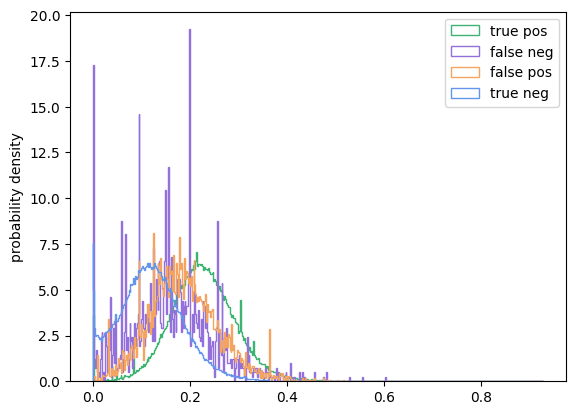

In [11]:
hc3_all_sentences_noenums_df = hc3_all_sentences_df[~hc3_all_sentences_df['text'].str.fullmatch('[0-9]\.')]
colors = ['cornflowerblue', 'sandybrown', 'mediumpurple', 'mediumseagreen']
labels = ['true neg', 'false pos', 'false neg', 'true pos']
compare_hist_gltr(
    hc3_all_sentences_noenums_df,
    [true_negatives, false_positives, false_negatives, true_positives],
    'token_prob',
    np.mean,
    500,
    colors,
    labels,
    fill=False,
    histtype='step',
    density=True,
)

c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


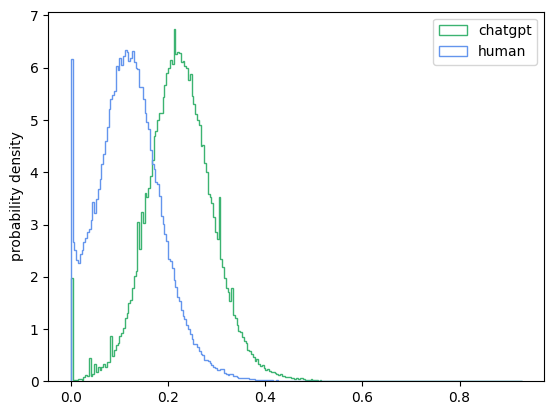

In [18]:
def human(data):
    return data['label'] == 0

def chatgpt(data):
    return data['label'] == 1

colors = ['cornflowerblue', 'mediumseagreen']
labels = ['human', 'chatgpt']

compare_hist_gltr(
    hc3_all_sentences_df,
    [human, chatgpt],
    'token_prob',
    np.mean,
    250,
    colors,
    labels,
    fill=False,
    histtype='step',
    density=True,
)

In [15]:
hc3_all_sentences_df['token_prob_log'] = hc3_all_sentences_df['token_prob'].map(np.log)

c:\Code\GPT-Hero\.venv\lib\site-packages\pandas\core\base.py:890: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Code\GPT-Hero\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: supplied range of [-inf, -0.2687256590391861] is not finite

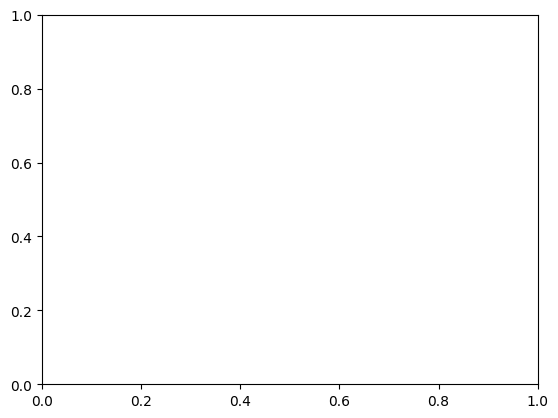

In [16]:
colors = ['cornflowerblue', 'mediumseagreen']
labels = ['human', 'chatgpt']

compare_hist_gltr(
    hc3_all_sentences_df,
    [human, chatgpt],
    'token_prob_log',
    np.mean,
    500,
    colors,
    labels,
    fill=False,
    histtype='step',
    density=True,
)

In [ ]:
hc3_all_sentences_df['token_prob'].describe()